Projeto classificação clientes

# Importações

In [ ]:
!pip install skorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.3/239.3 kB 6.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch.nn as nn
import torch
import skorch
from skorch import NeuralNetBinaryClassifier   # CASSIFICADOR PARA PROBLEMAS BINÁRIOS
from sklearn.preprocessing import LabelEncoder       # transformar textos de classificação em número
import sklearn
from sklearn.model_selection import cross_val_score

# Carregar e visualizar dados

In [ ]:
dados = pd.read_csv('survey lung cancer.csv')
dados.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
classe = dados[["LUNG_CANCER"]].copy()
classe["LUNG_CANCER"]  = classe["LUNG_CANCER"].apply(lambda x: 1 if x == "YES" else 0)
#classe[classe["LUNG_CANCER"]==0]
classe.head(10)

,LUNG_CANCER
0,1
1,1
2,0
3,0
4,0
5,1
6,1
7,1
8,0
9,1


In [ ]:
dados = dados.iloc[:,:-1]
#previsores = pd.Dataframe()
#for col in dados.columns:
#  item_um  = dados[[col]].iloc[0,:]
#  if col != "AGE":
#    lista = pd.Series()
#    lista =
#  print(item_um)

In [ ]:
encoder = LabelEncoder()  # por meio do objeto encoder iremos atribuir valores númericos ao dataset de resultados
dados["GENDER"] = encoder.fit_transform(dados["GENDER"])
dados

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2


In [ ]:
previsores = dados.copy()
previsores

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2


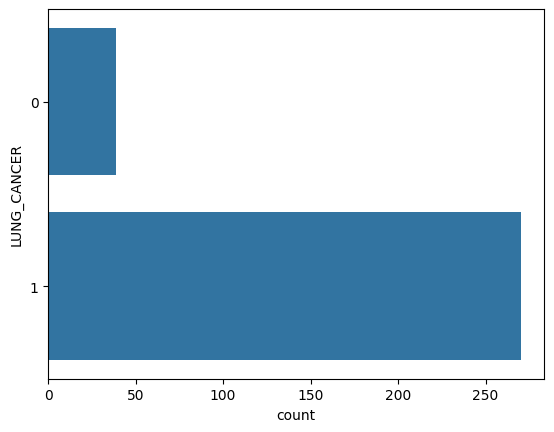

In [ ]:
classe = classe.astype('category')
sns.countplot(classe['LUNG_CANCER']);

In [ ]:
classe.shape

(309, 1)

In [ ]:
previsores = np.array(previsores, dtype='float32')
classe = np.array(classe, dtype='float32').squeeze(1)

In [ ]:
type(previsores)

numpy.ndarray

In [ ]:
type(classe)

numpy.ndarray

# Criação da rede neural

In [ ]:
class classificador_torch(nn.Module):
  def __init__(self):
    super().__init__()

    # 15 -> 8 -> 8 -> 1
    self.dense0 = nn.Linear(15, 8)
    torch.nn.init.uniform_(self.dense0.weight)
    self.activation0 = nn.ReLU()
    self.dropout0 = nn.Dropout(0.2)
    self.dense1 = nn.Linear(8, 8)
    torch.nn.init.uniform_(self.dense1.weight)
    self.activation1 = nn.ReLU()
    self.dropout1 = nn.Dropout(0.2)
    self.dense2 = nn.Linear(8, 1)
    torch.nn.init.uniform_(self.dense2.weight)

  def forward(self, X):
    X = self.dense0(X)
    X = self.activation0(X)
    X = self.dropout0(X)
    X = self.dense1(X)
    X = self.activation1(X)
    X = self.dropout1(X)
    X = self.dense2(X)
    return X

In [ ]:
classificador_sklearn = NeuralNetBinaryClassifier(module=classificador_torch,
                                                  criterion=torch.nn.BCEWithLogitsLoss,
                                                  optimizer=torch.optim.Adam,
                                                  lr=0.001,
                                                  optimizer__weight_decay=0.0001,
                                                  max_epochs=100,
                                                  batch_size=10,
                                                  train_split=False)

# Validação Cruzada

In [ ]:
resultados = cross_val_score(classificador_sklearn, previsores, classe, cv = 10, scoring = 'accuracy')

In [ ]:
media = resultados.mean()
mediadesvio = resultados.std()
print(f"Resultados: \n{resultados}\nMédia: {media}\nMédia Desvio: {mediadesvio}")


Resultados: 
[0.87096774 0.87096774 0.87096774 0.87096774 0.87096774 0.87096774
 0.87096774 0.87096774 0.87096774 0.9       ]
Média: 0.8738709677419354
Média Desvio: 0.008709677419354843


# Transformação para Tensores

In [ ]:
previsores = torch.tensor(np.array(previsores), dtype = torch.float)
classe = torch.tensor(np.array(classe), dtype = torch.float).view(-1,1)

In [ ]:
classe.shape


torch.Size([309, 1])

# Treinamento do modelo

In [ ]:
dataset = torch.utils.data.TensorDataset(previsores, classe)
train_loader = torch.utils.data.DataLoader(dataset, batch_size = 10, shuffle = True)

In [ ]:
classificador = classificador_torch()

In [ ]:
optimizer = torch.optim.Adam(classificador.parameters(), lr = 0.001,
                             weight_decay = 0.0001)

In [ ]:
criterion = nn.BCEWithLogitsLoss()

In [ ]:
for epoch in range(100):
    running_loss = 0.

    for data in train_loader:
        inputs, labels = data
        optimizer.zero_grad()

        outputs = classificador.forward(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print('Época %3d: perda %.5f' % (epoch+1, running_loss/len(train_loader)))

Época   1: perda 77.38705
Época   2: perda 66.40066
Época   3: perda 51.23305
Época   4: perda 48.32242
Época   5: perda 44.08344
Época   6: perda 37.71351
Época   7: perda 29.48137
Época   8: perda 25.38311
Época   9: perda 21.80549
Época  10: perda 18.09595
Época  11: perda 17.13122
Época  12: perda 11.64130
Época  13: perda 10.03292
Época  14: perda 7.04015
Época  15: perda 8.11029
Época  16: perda 7.27474
Época  17: perda 7.30717
Época  18: perda 6.55879
Época  19: perda 5.69350
Época  20: perda 5.53450
Época  21: perda 6.15829
Época  22: perda 5.55293
Época  23: perda 5.06787
Época  24: perda 5.62308
Época  25: perda 5.96181
Época  26: perda 4.06074
Época  27: perda 3.51473
Época  28: perda 3.89764
Época  29: perda 3.91474
Época  30: perda 3.33891
Época  31: perda 3.05401
Época  32: perda 3.26377
Época  33: perda 3.63713
Época  34: perda 2.88706
Época  35: perda 2.65105
Época  36: perda 2.92201
Época  37: perda 2.70605
Época  38: perda 1.94907
Época  39: perda 1.90945
Época  40: p

In [ ]:
classificador.state_dict()


OrderedDict([('dense0.weight',
              tensor([[-0.2038, -0.0251,  0.4954,  0.5710,  0.1627, -0.0932, -0.1200,  0.1575,
                        0.4367, -0.0508, -0.2760, -0.2297,  0.0437,  0.1134,  0.5024],
                      [-0.1464,  0.3037,  0.3455, -0.4421,  0.3386, -0.4217, -0.1361, -0.5427,
                       -0.1666, -0.4065,  0.4245,  0.0344,  0.2537, -0.4039,  0.1741],
                      [ 0.2742, -0.1045,  0.6727, -0.0088,  0.5890,  0.4641,  0.2451,  0.2955,
                        0.6966,  0.5700,  0.4317,  0.3979,  0.4633,  0.5701,  0.2785],
                      [ 0.1008,  0.0125,  0.2807, -0.2419,  0.4213,  0.1859, -0.0821, -0.0662,
                       -0.2300, -0.2481, -0.4044,  0.1957, -0.4337, -0.4274,  0.0471],
                      [ 0.2277,  0.5491,  0.0517,  0.3935,  0.4632, -0.0164,  0.3991,  0.1036,
                       -0.3826, -0.1019,  0.0196, -0.1431, -0.2913, -0.0852, -0.3475],
                      [ 0.2033, -0.0496, -0.3064,  0.5182, 

In [ ]:
torch.save(classificador.state_dict(), 'checkpoint_01_class_bin_lungs.pth')